# Bilin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from streng.tools.bilin import Bilin

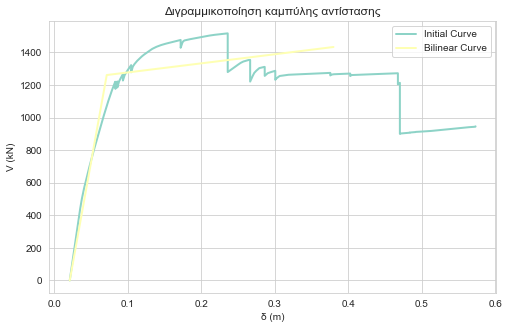

In [4]:
bl = Bilin(xtarget=0.38)

bl.curve_ini.load_delimited(r'D:/Programming/PyMyPackages/pystreng/tests/bilin/Example4', ' ')
# bl.load_space_delimited(r'D:/MyBooks/TEI/RepairsExample/sapfiles/fema/PushoverCurve_modal.txt', ' ')
bl.calc()

f, ax = plt.subplots(figsize=(8, 5))
ax.plot(bl.curve_ini.x, bl.curve_ini.y, label="Initial Curve", lw=2)
ax.plot(bl.bilinear_curve.d_array, bl.bilinear_curve.a_array, label="Bilinear Curve", lw=2)
ax.set_title('Διγραμμικοποίηση καμπύλης αντίστασης')
ax.set_ylabel('V (kN)')
ax.set_xlabel('δ (m)')
ax.legend()
fig = (f, ax)
plt.show()

In [3]:
print(bl.bilinear_curve.all_quantities)

| quantity   |     value |
|:-----------|----------:|
| x_0        | 2.140E-02 |
| x_y        | 7.275E-02 |
| x_u        | 3.500E-01 |
| y_0        | 0.000E+00 |
| y_y        | 1.279E+03 |
| y_u        | 1.434E+03 |
| kel        | 2.490E+04 |
| kinel      | 5.618E+02 |
| μ          | 6.400E+00 |
| α          | 2.256E-02 |


In [4]:
bl.bilinear_curve.all_quantities.retrieve('quantity', 'x_u', 'value')

0.35

In [5]:
def f(x):
    bl = Bilin(xtarget=x/1000., dropstrength=0.6)

    bl.curve_ini.load_delimited(r'D:/Programming/PyMyPackages/pystreng/tests/bilin/Example4', ' ')
    bl.calc()

    plt.plot(bl.curve_ini.x, bl.curve_ini.y)
    plt.plot(bl.bilinear_curve.d_array, bl.bilinear_curve.a_array)
    plt.show()
    return x

interact(f, x=widgets.IntSlider(min=50,max=600,step=1,value=200));

interactive(children=(IntSlider(value=200, description='x', max=600, min=50), Output()), _dom_classes=('widget…

In [6]:
def f_str(x):
    if len(x)>0:
        bl = Bilin()
        bl.curve_ini.load_space_delimited_string(x)
        bl.calc()

        plt.plot(bl.curve_ini.x, bl.curve_ini.y)
        plt.plot(bl.bilinear_curve.d_array, bl.bilinear_curve.a_array)
        plt.show()
    
interact(f_str, x=widgets.Textarea(
    placeholder='Paste space delimited x-y values:',
    description='Initial curve',
    disabled=False));

interactive(children=(Textarea(value='', description='Initial curve', placeholder='Paste space delimited x-y v…

In [7]:
print(bl)

Bilin main output

Αρχική μετατόπιση: 0.0214

Έλεγχος στο 20% του ymax
x(02)=0.009792445820433439, y(02)=303.416. Οπότε k(02)=30984.70040721349

Εμβαδό καμπύλης: 408.94865204545454


In [8]:
print(bl.output.outputStrings['main'])
# print(bl.output)

Bilin main output

Αρχική μετατόπιση: 0.0214

Έλεγχος στο 20% του ymax
x(02)=0.009792445820433439, y(02)=303.416. Οπότε k(02)=30984.70040721349

Εμβαδό καμπύλης: 408.94865204545454


In [9]:
bl.output.outputTables['InitialCurve'].to_panda_dataframe.head(20)


,x,y
0,0.0214,0.00
1,0.0237,71.07
2,0.0260,142.14
3,0.0283,213.21
4,0.0306,284.28
5,0.0328,355.34
6,0.0351,426.41
7,0.0356,440.66
8,0.0379,501.46
9,0.0409,566.15


In [10]:
print(bl.output.outputStrings['main'])

Bilin main output

Αρχική μετατόπιση: 0.0214

Έλεγχος στο 20% του ymax
x(02)=0.009792445820433439, y(02)=303.416. Οπότε k(02)=30984.70040721349

Εμβαδό καμπύλης: 408.94865204545454


In [11]:
print(bl.output.outputTables['Iterations'].to_markdown)

|   __iteration |       x_y |       y_y |       x_u |       y_u |     kinel |       kel |      k_06 |     error |
|--------------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
|             1 | 3.962E-02 | 1.228E+03 | 3.286E-01 | 1.434E+03 | 7.162E+02 | 3.098E+04 | 2.540E+04 | 2.198E-01 |
|             2 | 5.013E-02 | 1.273E+03 | 3.286E-01 | 1.434E+03 | 5.784E+02 | 2.540E+04 | 2.495E+04 | 1.787E-02 |
|             3 | 5.122E-02 | 1.278E+03 | 3.286E-01 | 1.434E+03 | 5.635E+02 | 2.495E+04 | 2.491E+04 | 1.824E-03 |
|             4 | 5.133E-02 | 1.279E+03 | 3.286E-01 | 1.434E+03 | 5.620E+02 | 2.491E+04 | 2.490E+04 | 1.892E-04 |
|             5 | 5.134E-02 | 1.279E+03 | 3.286E-01 | 1.434E+03 | 5.618E+02 | 2.490E+04 | 2.490E+04 | 1.966E-05 |
|             6 | 5.135E-02 | 1.279E+03 | 3.286E-01 | 1.434E+03 | 5.618E+02 | 2.490E+04 | 2.490E+04 | 2.043E-06 |
|             7 | 5.135E-02 | 1.279E+03 | 3.286E-01 | 1.434E+03 | 5.618E+02 | 2.490E+04 

In [12]:
print(bl.output.outputTables['BilinearCurve'].to_markdown)

|         x |         y |
|----------:|----------:|
| 2.140E-02 | 0.000E+00 |
| 7.275E-02 | 1.279E+03 |
| 3.500E-01 | 1.434E+03 |


In [13]:
print(bl.bilinear_curve.all_quantities)

| quantity   |     value |
|:-----------|----------:|
| x_0        | 2.140E-02 |
| x_y        | 7.275E-02 |
| x_u        | 3.500E-01 |
| y_0        | 0.000E+00 |
| y_y        | 1.279E+03 |
| y_u        | 1.434E+03 |
| kel        | 2.490E+04 |
| kinel      | 5.618E+02 |
| μ          | 6.400E+00 |
| α          | 2.256E-02 |
